## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, adjusted_rand_score, silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial
import time
import warnings

from DataManagment import *
from Classifiers import *
from Evaluators import *
from Metrics import *
from ResultsManagment import *


## Code

### Training

Loading Iris dataset from: ../data\iris.csv
🚀 Training soft-negative SiameseNetwork for iris...
Using device: cpu for training
Same class mean: 0.9581854002928714
Same class std: 0.5564436492703124
Same class outliers: 38
Diff class mean: 3.3814868050690166
Diff class std: 1.4170107252373207
Diff class outliers: 0
{'same_class_mean': np.float64(0.9581854002928714), 'same_class_std': np.float64(0.5564436492703124), 'diff_class_mean': np.float64(3.3814868050690166), 'diff_class_std': np.float64(1.4170107252373207), 'same_class_outliers': np.int64(38), 'diff_class_outliers': np.int64(0)}
Same class mean: 1.0706261649308966
Same class std: 0.5607952587909724
Same class outliers: 9
Diff class mean: 3.1645916378688814
Diff class std: 1.4256872640867528
Diff class outliers: 0
{'same_class_mean': np.float64(1.0706261649308966), 'same_class_std': np.float64(0.5607952587909724), 'diff_class_mean': np.float64(3.1645916378688814), 'diff_class_std': np.float64(1.4256872640867528), 'same_class_outli

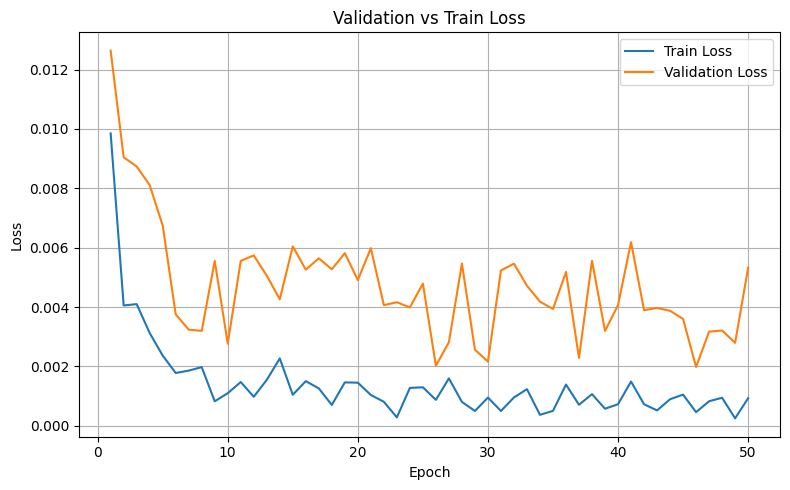

✅ Soft-negative training complete for iris. Model saved in ../models
🔍 Computing embeddings for iris...
✅ Embeddings computed for iris
🚀 Training hard-negative SiameseNetwork for iris...
Using device: cpu for hard negative training
Same class mean: 0.973523996175113
Same class std: 0.546699004847661
Same class outliers: 32
Diff class mean: 3.329270674809515
Diff class std: 1.4089847810304996
Diff class outliers: 0
{'same_class_mean': np.float64(0.973523996175113), 'same_class_std': np.float64(0.546699004847661), 'diff_class_mean': np.float64(3.329270674809515), 'diff_class_std': np.float64(1.4089847810304996), 'same_class_outliers': np.int64(32), 'diff_class_outliers': np.int64(0)}
[Hard Negative] Epoch 1/50, Loss: 0.6707
[Hard Negative] Epoch 2/50, Loss: 0.2791
[Hard Negative] Epoch 3/50, Loss: 0.1517
[Hard Negative] Epoch 4/50, Loss: 0.1106
[Hard Negative] Epoch 5/50, Loss: 0.0866
[Hard Negative] Epoch 6/50, Loss: 0.0703
[Hard Negative] Epoch 7/50, Loss: 0.0506
[Hard Negative] Epoch 

In [3]:
from Testing.testTraining import *
# train_siamese_for_dataset("iris", epochs=50)
train_hard_negative_siamese_for_dataset("iris", epochs=50)

### Evaluation

In [2]:
import logging
logging.getLogger().setLevel(logging.WARNING)

In [2]:
from Testing.testEvaluation import *
from Evaluators import show_all_fold_histograms

2025-06-17 13:03:59,470 - WARNING - Mean cross-validation accuracy: 0.9600
2025-06-17 13:03:59,471 - WARNING - Mean F1: 0.9599
2025-06-17 13:03:59,472 - WARNING - Mean Precision: 0.9609
2025-06-17 13:03:59,472 - WARNING - Mean Recall: 0.9600
2025-06-17 13:03:59,473 - WARNING - Mean Silhouette: 0.4968


Evaluator initialized with random state: 6858
Loading Iris dataset from: ../data\iris.csv
Score: 0.96
Misclassified samples per fold:
Fold 1: 0 misclassified samples
Fold 2: 3 misclassified samples
idx: 70  Sample: [5.9 3.2 4.8 1.8]
idx: 119  Sample: [6.  2.2 5.  1.5]
idx: 133  Sample: [6.3 2.8 5.1 1.5]
Fold 3: 3 misclassified samples
idx: 72  Sample: [6.3 2.5 4.9 1.5]
idx: 83  Sample: [6.  2.7 5.1 1.6]
idx: 106  Sample: [4.9 2.5 4.5 1.7]
Fold 4: 0 misclassified samples
Fold 5: 0 misclassified samples


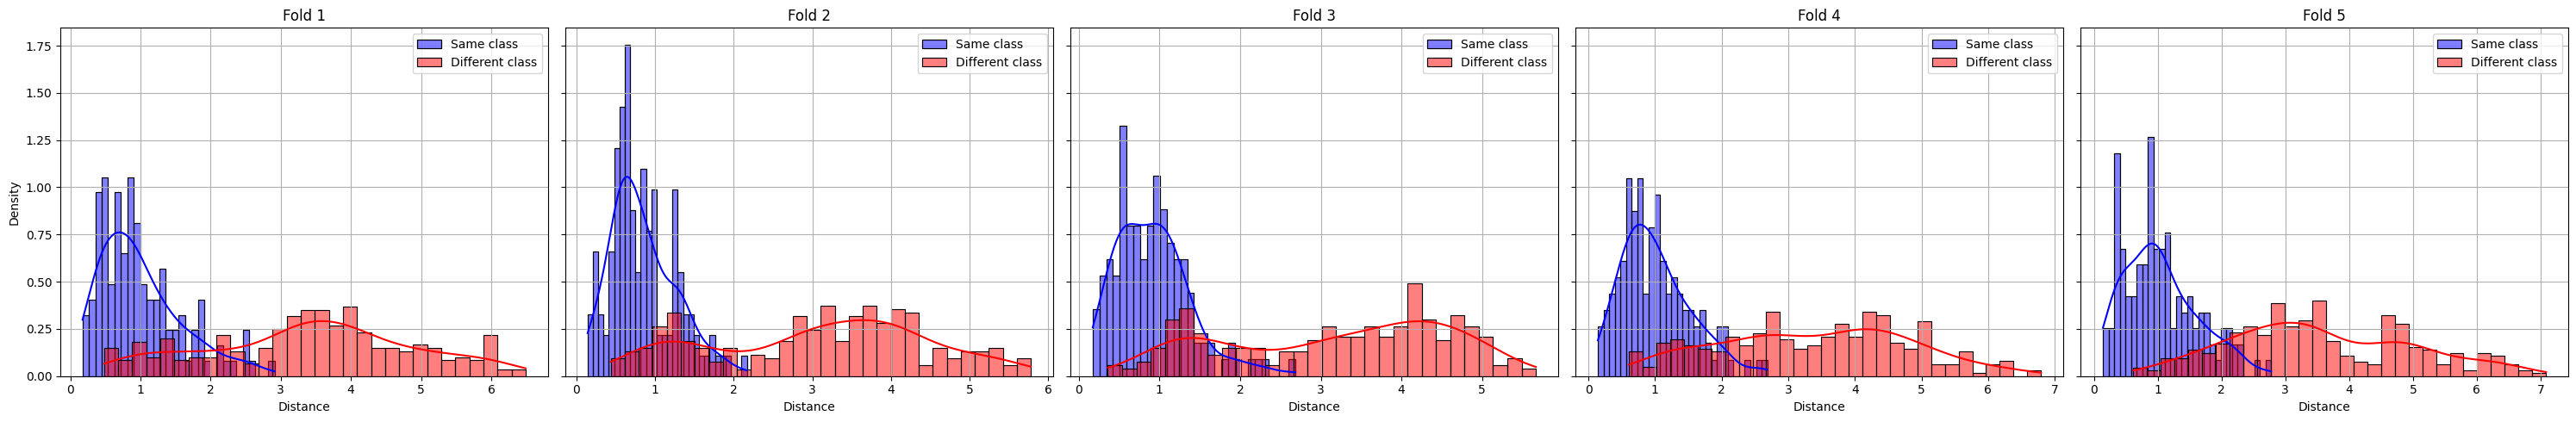

In [29]:
score, misclassified_samples_per_fold, distDistributions = evaluate_combination("KNN", "iris", "Euclidean")
print(f"Score: {score}")
print(f"Misclassified samples per fold:")
for fold, misclassified in enumerate(misclassified_samples_per_fold):
    print(f"Fold {fold + 1}: {len(misclassified)} misclassified samples")
    for idx, sample in misclassified.items():
        print(f"idx: {idx}  Sample: {sample}")
show_all_fold_histograms(distDistributions)

In [1]:
score, misclassified_samples_per_fold, distDistributions = evaluate_combination("SVM", "wine", "SiameseNetwork")
print(f"Score: {score}")
print(f"Misclassified samples per fold:")
for fold, misclassified in enumerate(misclassified_samples_per_fold):
    print(f"Fold {fold + 1}: {len(misclassified)} misclassified samples")
    for idx, sample in misclassified.items():
        print(f"idx: {idx}  Sample: {sample}")
show_all_fold_histograms(distDistributions)

NameError: name 'evaluate_combination' is not defined

### Visualization

In [4]:
from Visualization import *

Generating synthetic moons dataset with seed 279, 200 samples and noise=0.2.


2025-06-03 16:44:35,611 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-03 16:44:35,614 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-03 16:44:35,618 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-06-03 16:44:35,619 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\tymon\\OneDrive\\Pulpit\\University\\Masters\\Sem1\\ProgramSynthesis\\Project\\inDISTrial_rEVOLUTION\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2025-06-03 16:44:35,619 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\tymon\\OneDrive\\Pulpit\\University\\Masters\\Sem1\\ProgramSynthesis\\Project\\inDISTrial_rEVOLUTION\\.venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXNonUni.ttf', name='STIXNonUnic

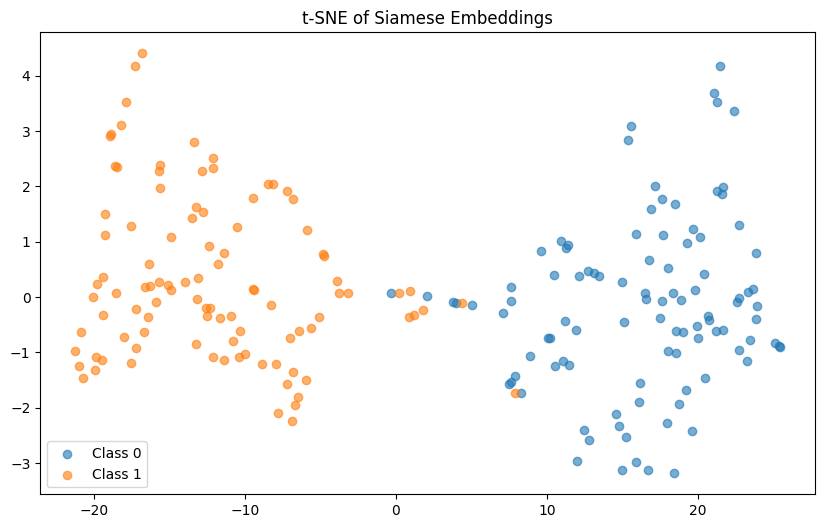

In [ ]:
dataLoader = DistDataLoader("../data")
dataset_moons = dataLoader.load_dataset('synthetic_moons')
input_dim = dataset_moons.X.shape[1]
model_moons = SiameseNetwork(input_dim=input_dim, embedding_dim=128, num_classes=len(dataset_moons.target_names))
model_moons.load_state_dict(torch.load("../models/siamese_model_synthetic_moons.pth", map_location='cpu'))
model_moons.eval()

visualize_embeddings(model_moons, dataset_moons)
visualize_2d_projection(dataset_moons)

Loading Iris dataset from: ../data\iris.csv


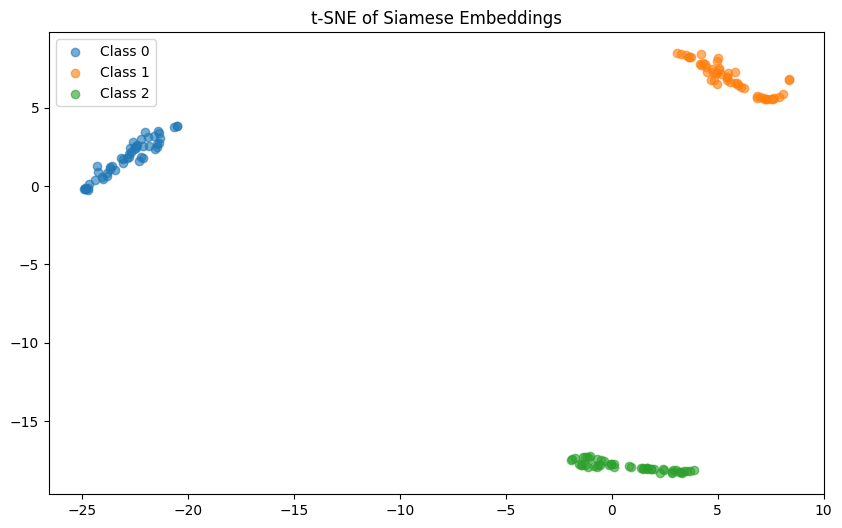

In [6]:
dataset_iris = dataLoader.load_dataset('iris')
input_dim_iris = dataset_iris.X.shape[1]
model_iris = SiameseNetwork(input_dim=input_dim_iris, embedding_dim=128, num_classes=len(dataset_iris.target_names))
model_iris.load_state_dict(torch.load("../models/siamese_model_iris.pth", map_location='cpu'))
model_iris.eval()

visualize_embeddings(model_iris, dataset_iris)

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading Iris dataset from: ../data\iris.csv
Loaded dataset: iris with 150 samples.
Visualizing dataset: iris
Sample size: All samples


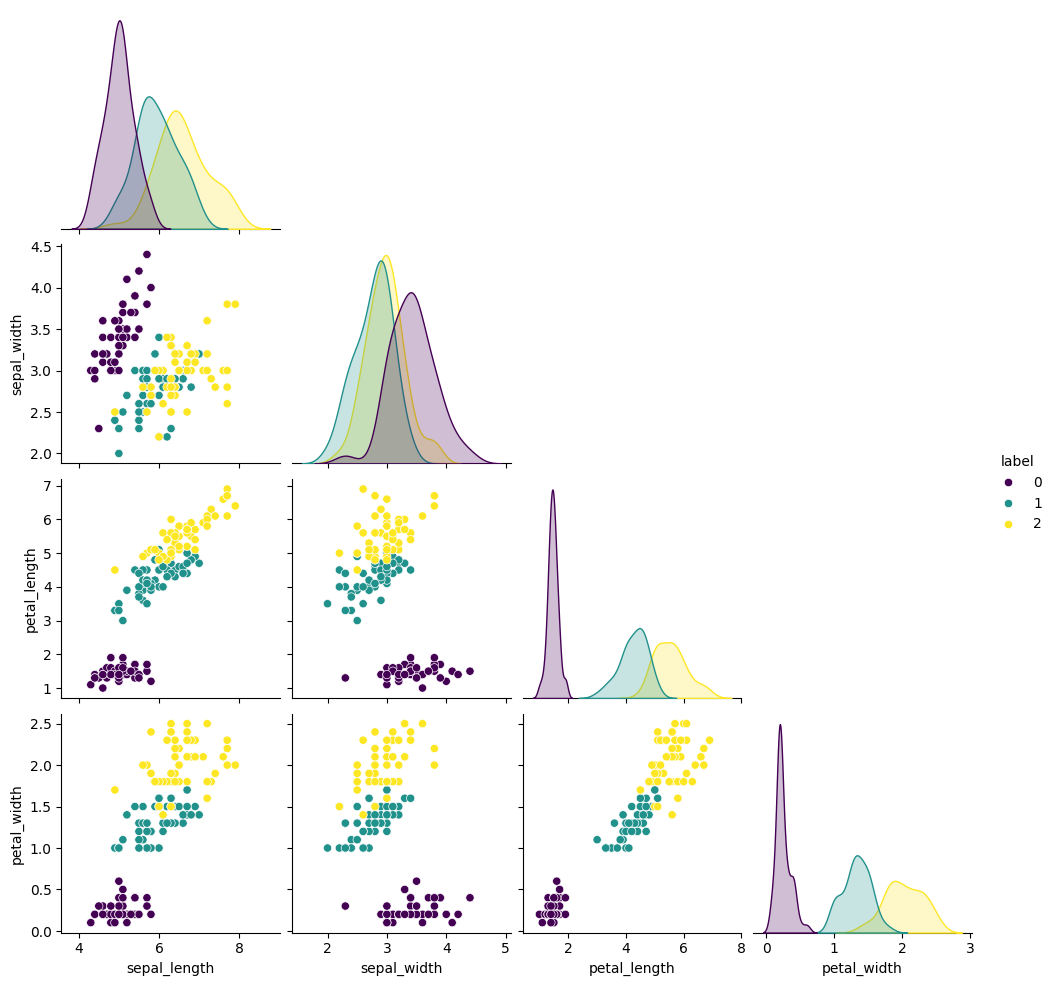

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\code\Visualization.py:77: UserWarning: This figure includes Axes that are not compatible with ti

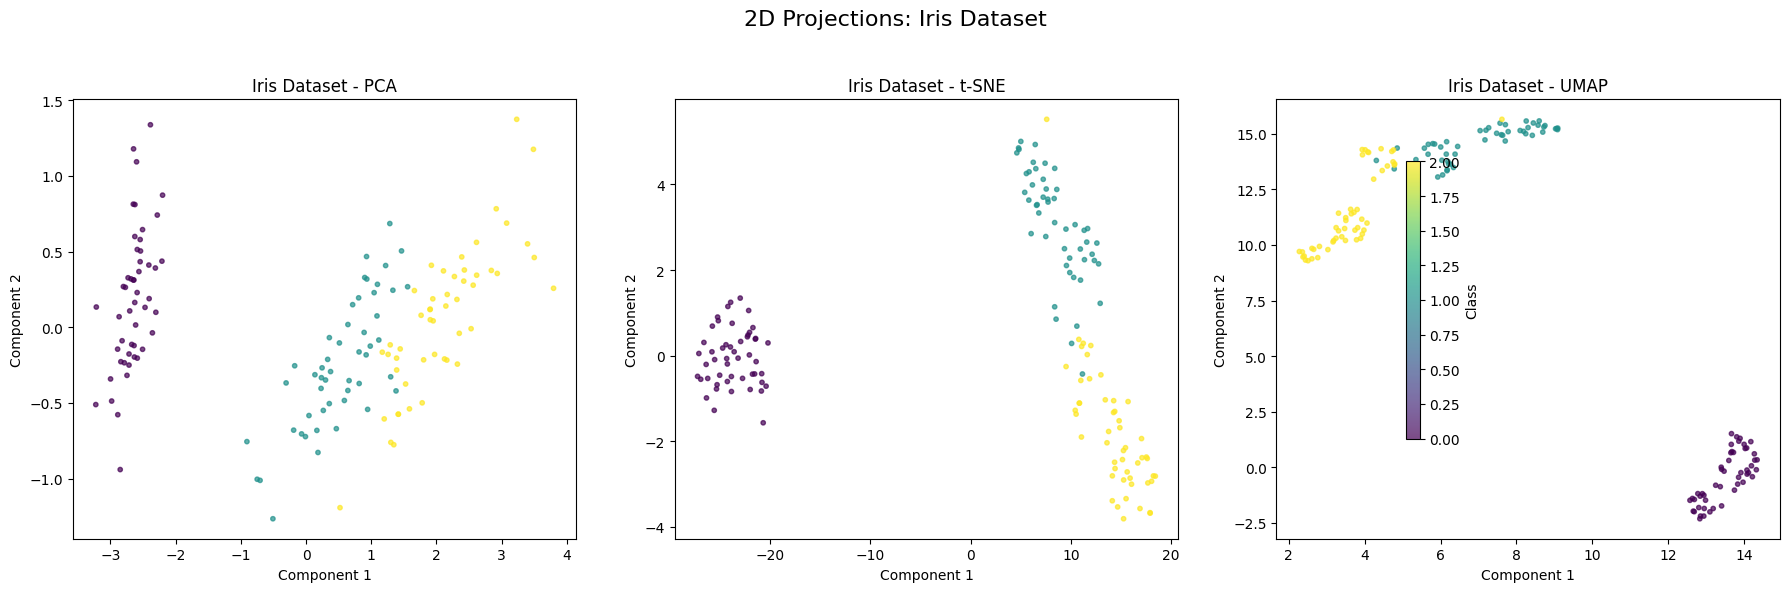

Visualization completed.
Loading Wine dataset from: ../data\wine.csv
Loaded dataset: wine with 1599 samples.
Visualizing dataset: wine
Sample size: All samples


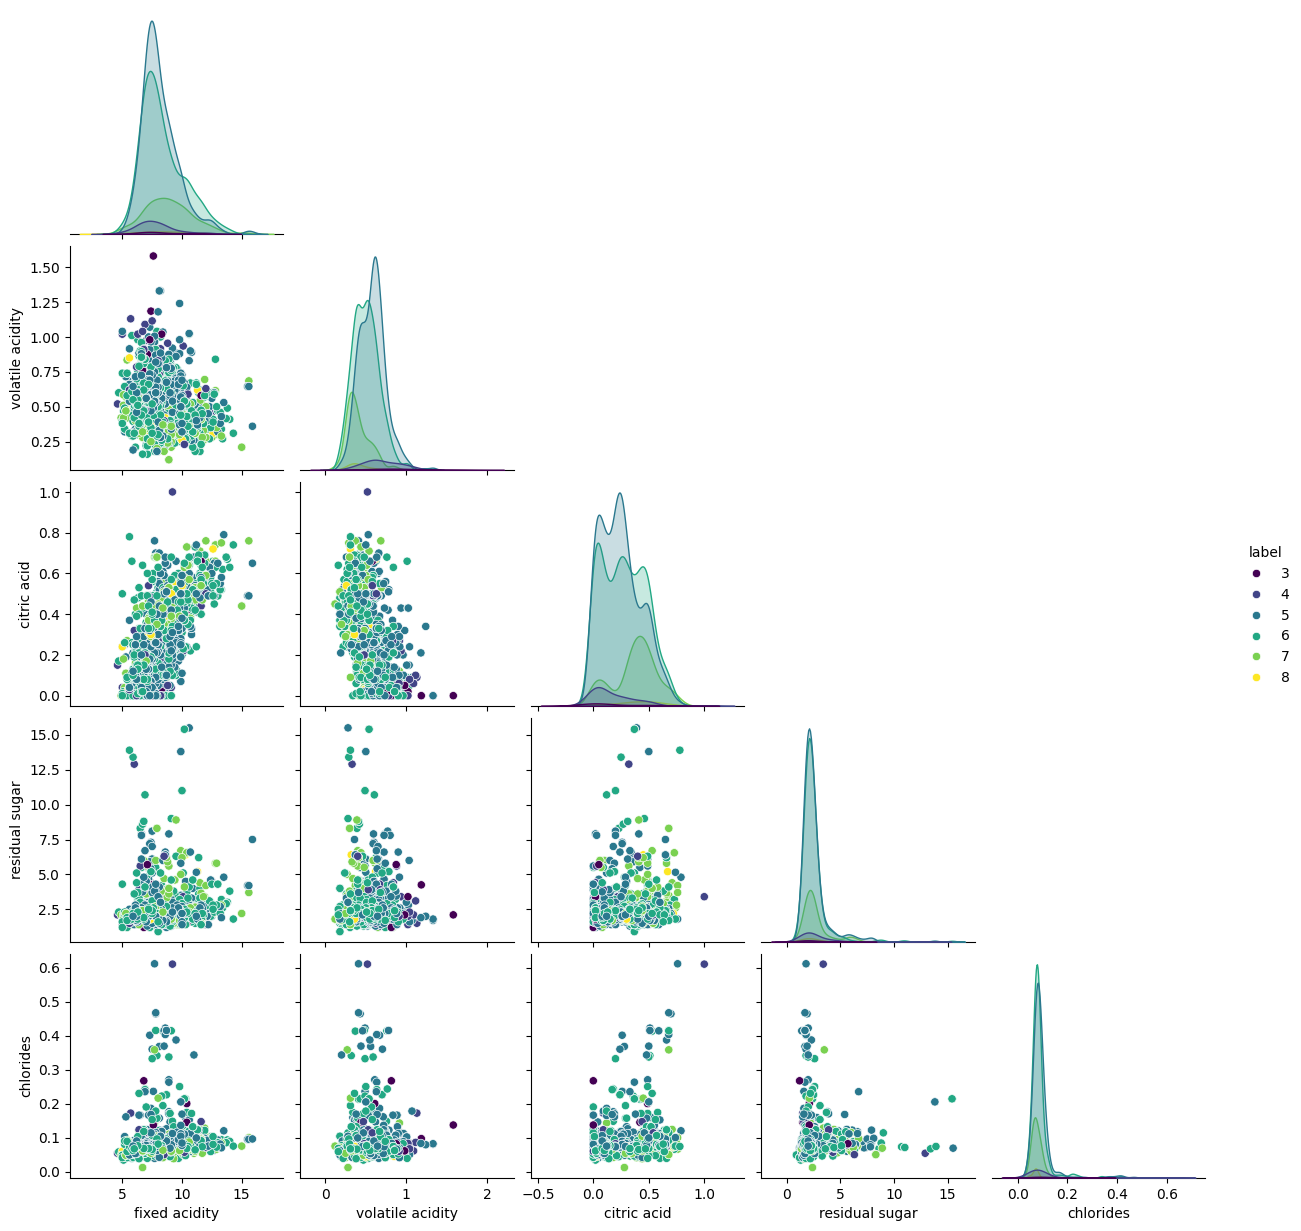

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\code\Visualization.py:77: UserWarning: This figure includes Axes that are not compatible with ti

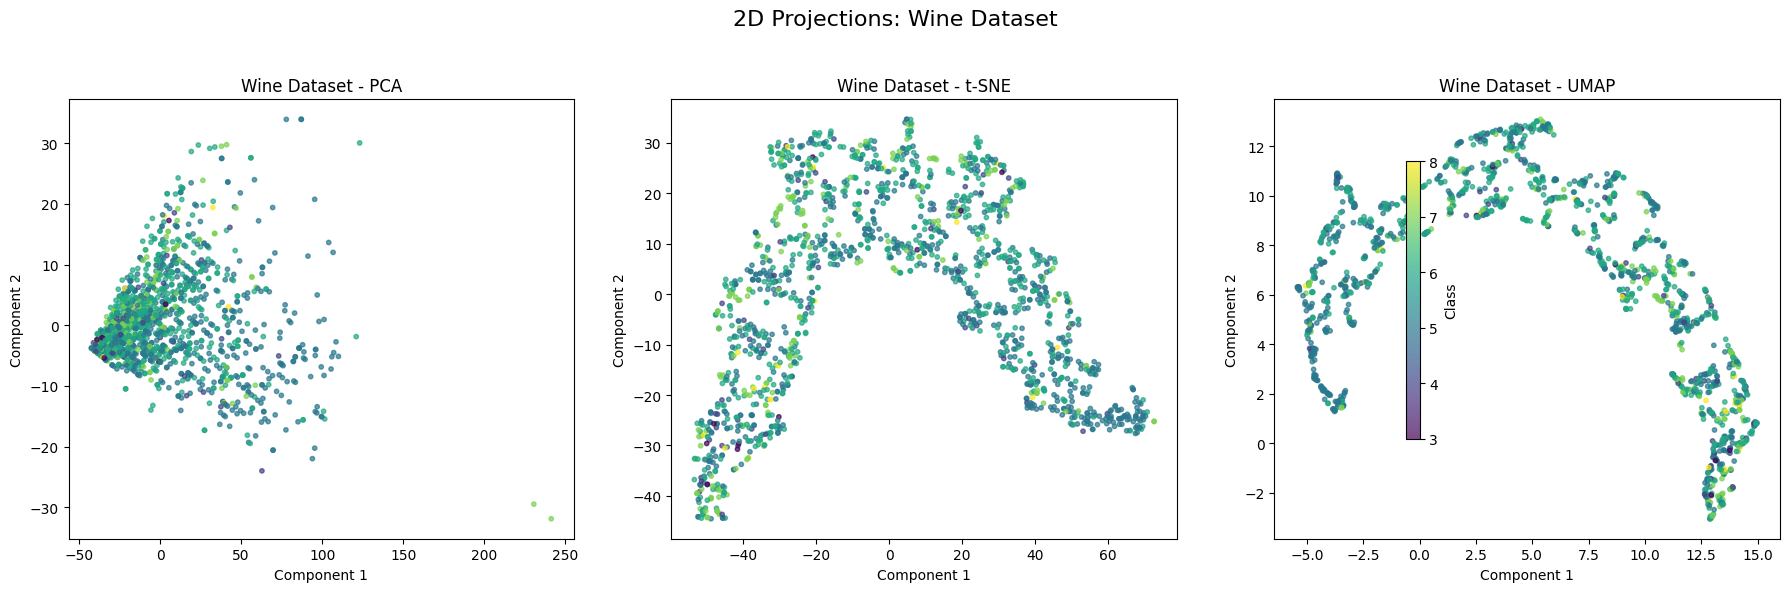

Visualization completed.
Loading Seeds dataset from: ../data\seeds.csv
Loaded dataset: seeds with 210 samples.
Visualizing dataset: seeds
Sample size: All samples


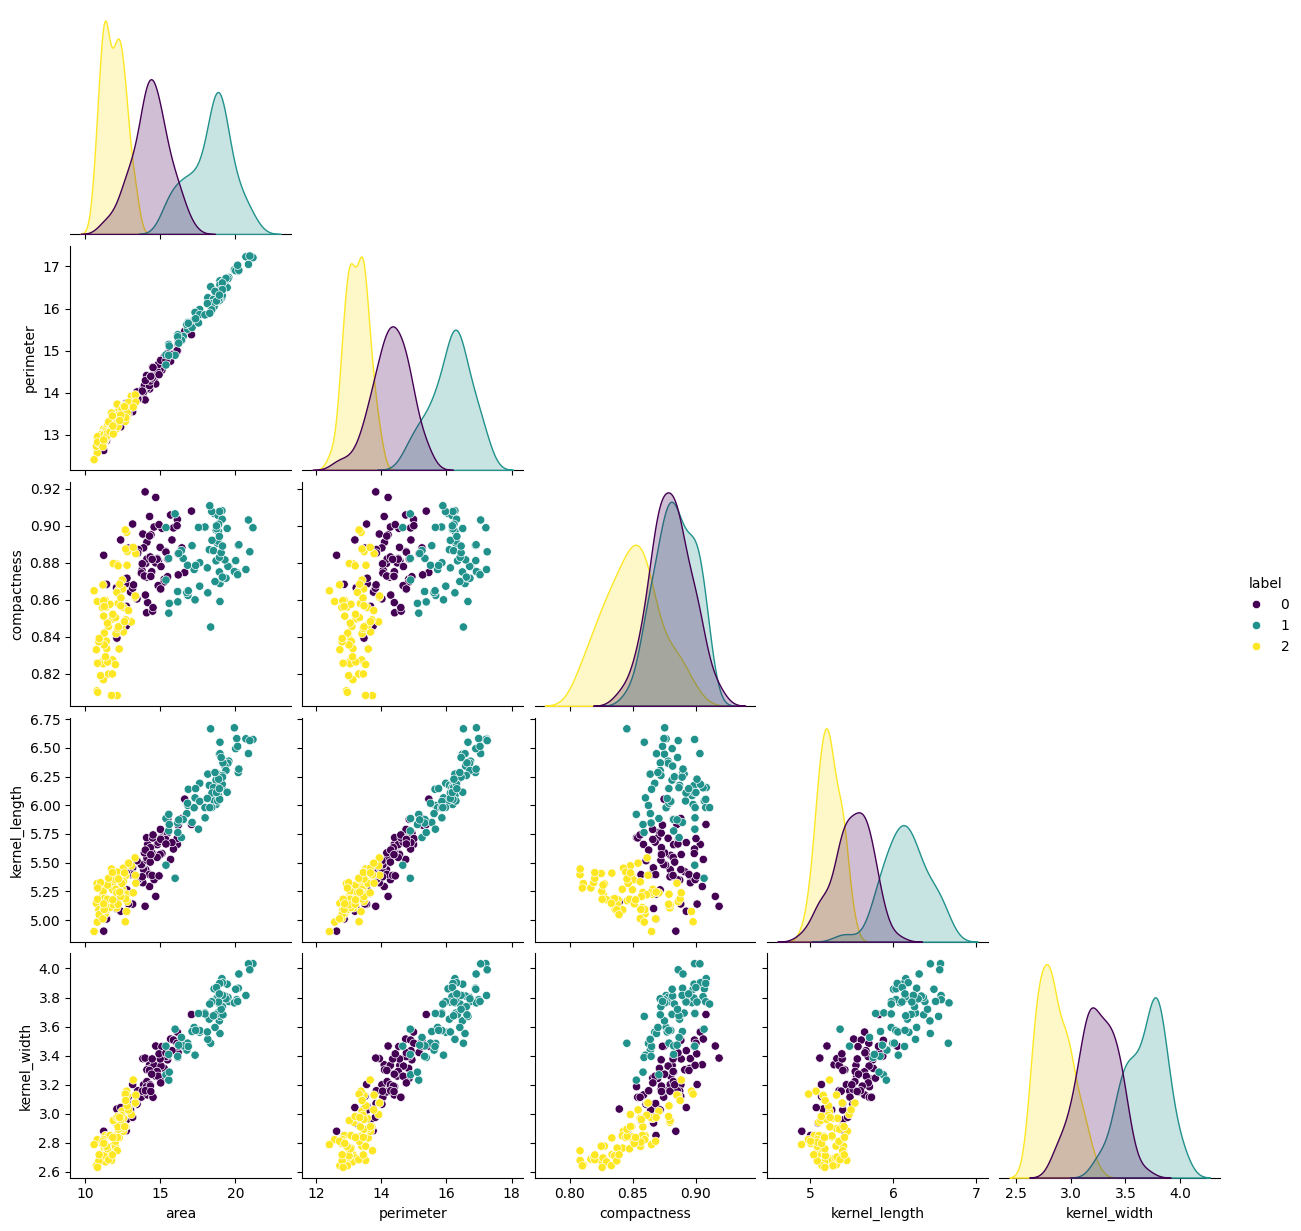

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\code\Visualization.py:77: UserWarning: This figure includes Axes that are not compatible with ti

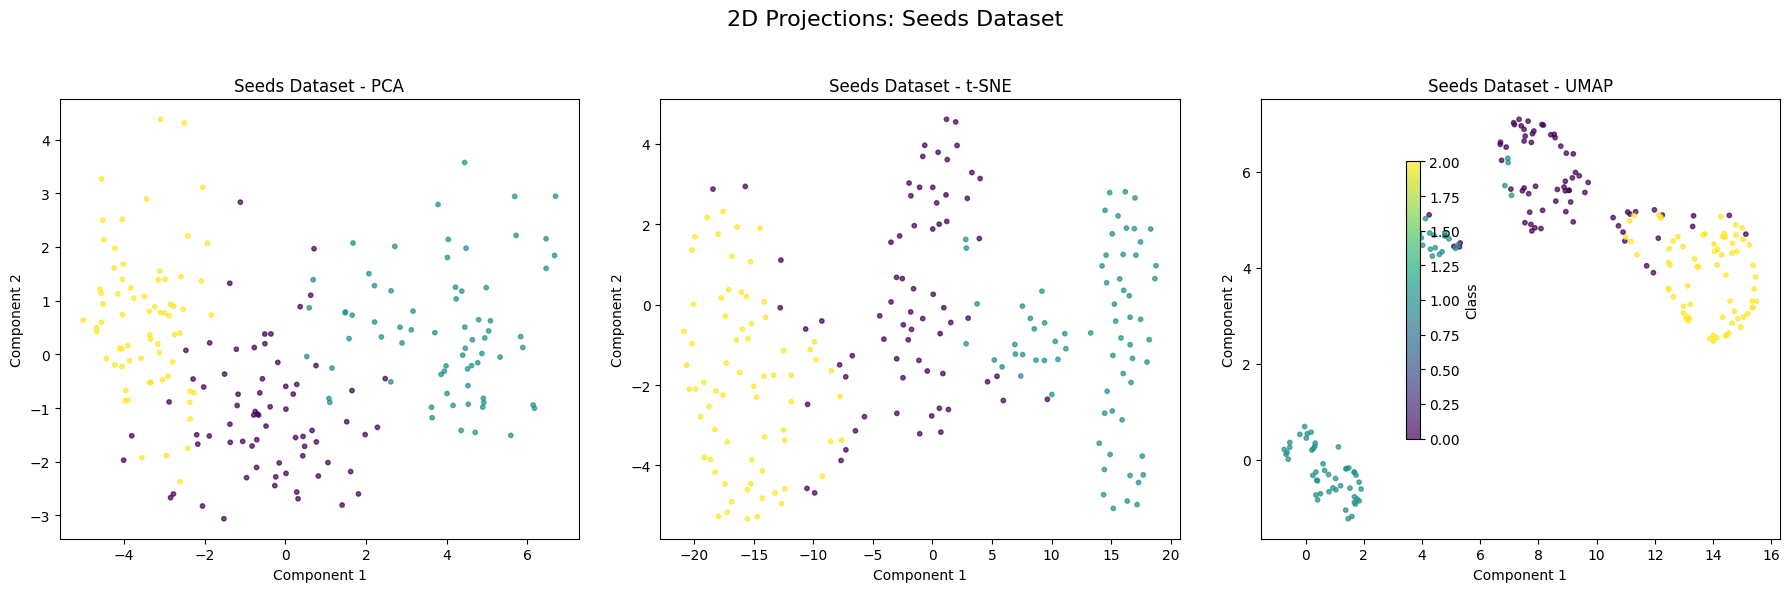

Visualization completed.
Loading Banknote dataset from: ../data\banknote.csv
Loaded dataset: banknote with 1372 samples.
Visualizing dataset: banknote
Sample size: All samples


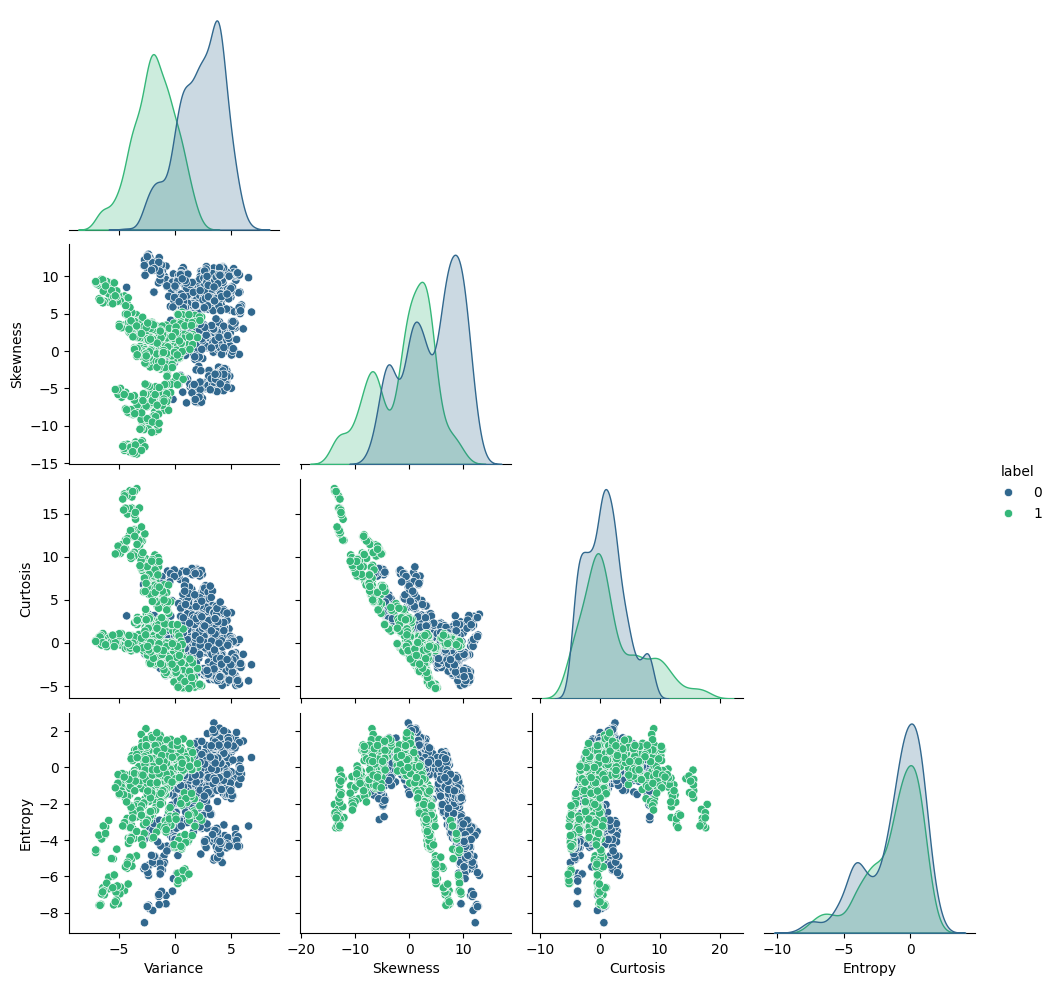

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The e

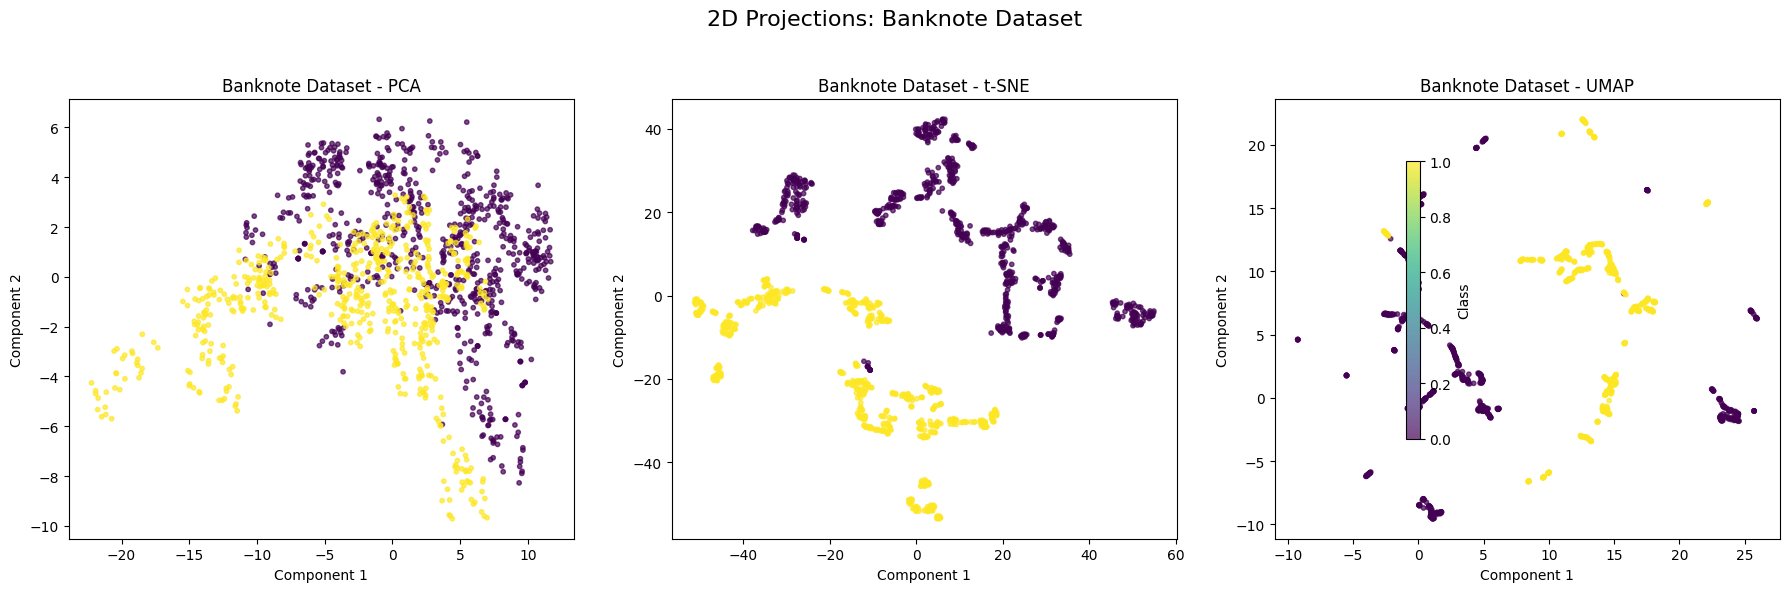

Visualization completed.
Loading Heart dataset from: ../data\heart.csv
Heart dataset not found locally. Please download it from UCI repository or run setup.sh script!
URL: https://archive.ics.uci.edu/ml/datasets/heart+Disease
Failed to load dataset.
Generating synthetic moons dataset with 1000 samples and noise=0.3.
Loaded dataset: synthetic_moons with 1000 samples.
Visualizing dataset: synthetic_moons
Sample size: All samples


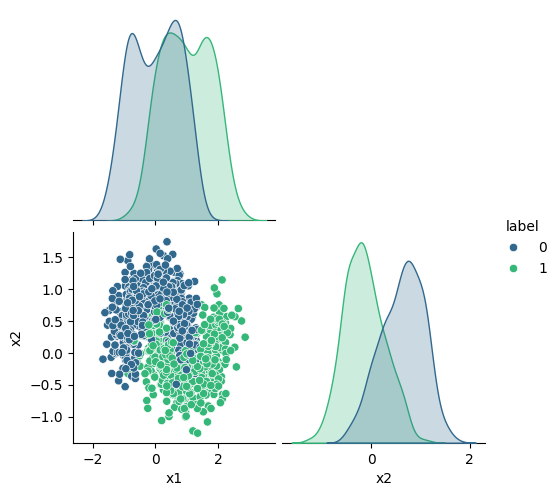

c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tymon\OneDrive\Pulpit\University\Masters\Sem1\ProgramSynthesis\Project\inDISTrial_rEVOLUTION\code\Visualization.py:77: UserWarning: This figure includes Axes that are not compatible with ti

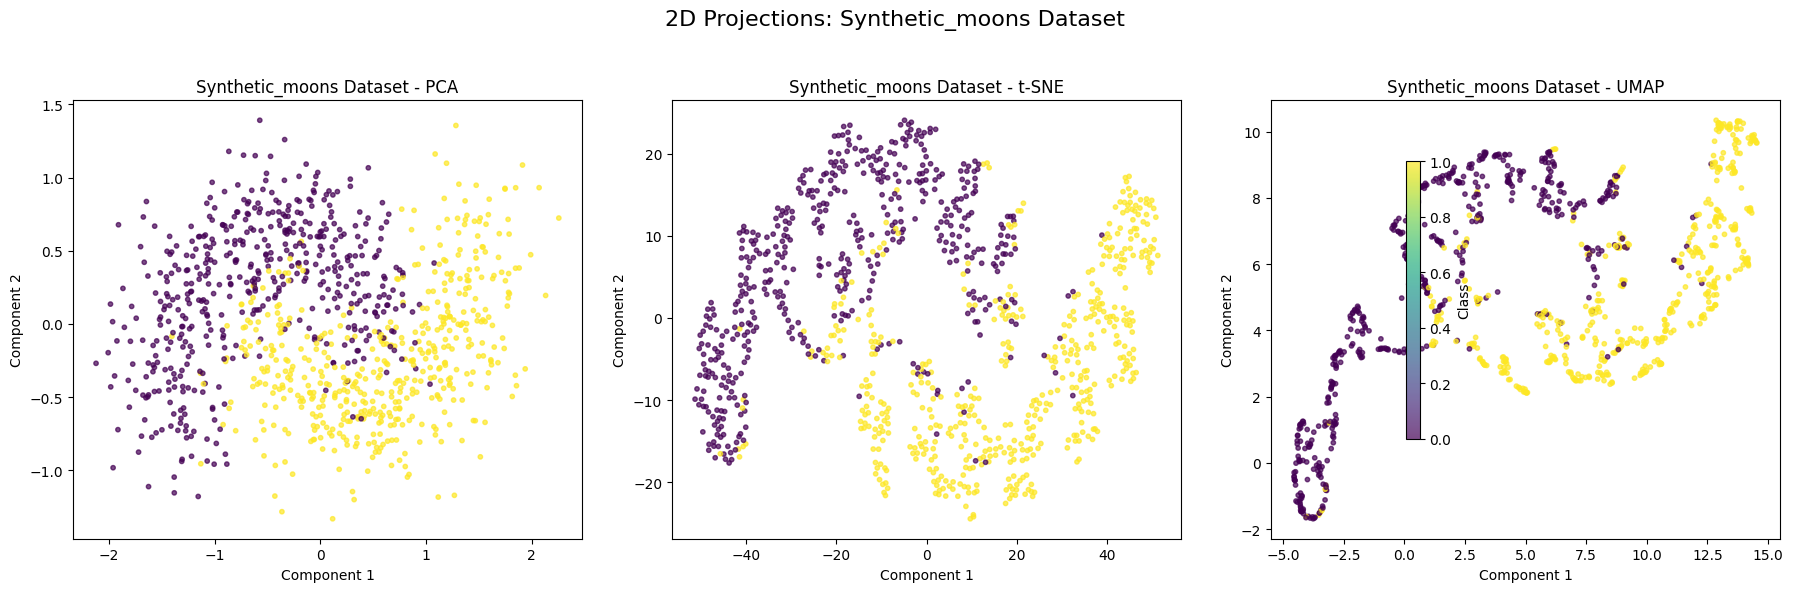

Visualization completed.


In [1]:
from Testing.testVisualization import *
testVisualization()

2025-06-02 23:00:22,143 - INFO - Cross-validating classifier (seed=7325) on the iris dataset with 5 folds...
2025-06-02 23:00:22,147 - INFO - Fold 1/5...
2025-06-02 23:00:22,148 - INFO - Fitting SVM classifier...
2025-06-02 23:00:22,149 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:22,189 - INFO - Making predictions with SVM classifier...
2025-06-02 23:00:22,190 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:22,209 - INFO - Accuracy: 0.9333
2025-06-02 23:00:22,210 - INFO - Fold 1 accuracy: 0.9333
2025-06-02 23:00:22,210 - INFO - Computing distance distribution statistics for metric-based classifier...
2025-06-02 23:00:22,232 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-02 23:00:22,239 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-06-02 23:00:22,243 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-06-02 23:00:22,245 - D

Loading Iris dataset from: ../data\iris.csv


2025-06-02 23:00:22,317 - DEBUG - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LTYPEB.TTF', name='Lucida Sans Typewriter', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
2025-06-02 23:00:22,318 - DEBUG - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\calibril.ttf', name='Calibri', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2025-06-02 23:00:22,318 - DEBUG - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BOD_BI.TTF', name='Bodoni MT', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2025-06-02 23:00:22,319 - DEBUG - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\Gabriola.ttf', name='Gabriola', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-06-02 23:00:22,320 - DEBUG - findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\BRADHITC.TTF', name='Bradley Hand ITC', style='normal', variant='

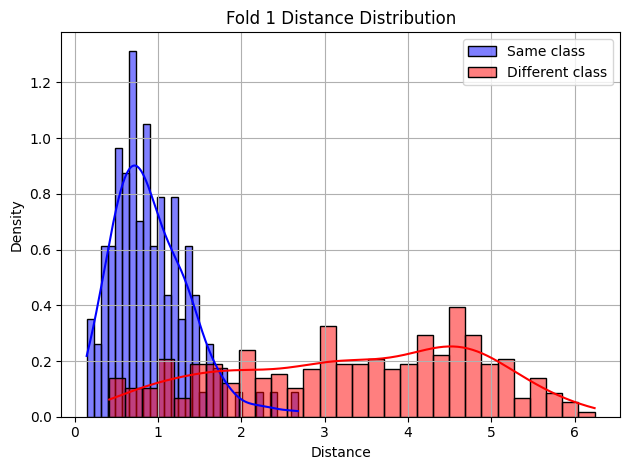

2025-06-02 23:00:23,050 - INFO - Fold 1 distance stats: {'same_class_mean': np.float64(0.909250481973704), 'same_class_std': np.float64(0.45704834608629397), 'diff_class_mean': np.float64(3.3339086896781125), 'diff_class_std': np.float64(1.456269039551221), 'margin': np.float64(2.4246582077044083)}
2025-06-02 23:00:23,050 - INFO - Fold 2/5...
2025-06-02 23:00:23,051 - INFO - Fitting SVM classifier...
2025-06-02 23:00:23,051 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,085 - INFO - Making predictions with SVM classifier...
2025-06-02 23:00:23,086 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,106 - INFO - Accuracy: 1.0000
2025-06-02 23:00:23,107 - INFO - Fold 2 accuracy: 1.0000
2025-06-02 23:00:23,107 - INFO - Computing distance distribution statistics for metric-based classifier...


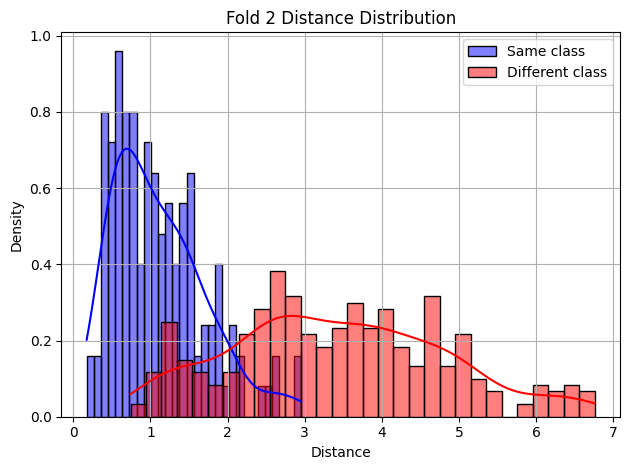

2025-06-02 23:00:23,387 - INFO - Fold 2 distance stats: {'same_class_mean': np.float64(1.104225581387824), 'same_class_std': np.float64(0.5890519176651741), 'diff_class_mean': np.float64(3.427677475018451), 'diff_class_std': np.float64(1.3857947637551296), 'margin': np.float64(2.3234518936306268)}
2025-06-02 23:00:23,388 - INFO - Fold 3/5...
2025-06-02 23:00:23,388 - INFO - Fitting SVM classifier...
2025-06-02 23:00:23,389 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,424 - INFO - Making predictions with SVM classifier...
2025-06-02 23:00:23,426 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,445 - INFO - Accuracy: 0.9667
2025-06-02 23:00:23,446 - INFO - Fold 3 accuracy: 0.9667
2025-06-02 23:00:23,447 - INFO - Computing distance distribution statistics for metric-based classifier...


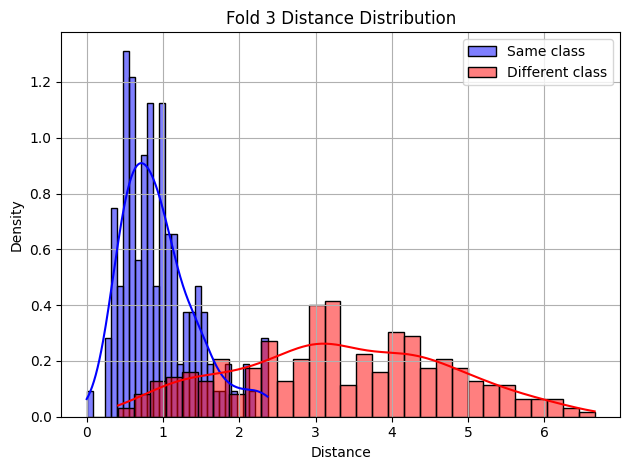

2025-06-02 23:00:23,681 - INFO - Fold 3 distance stats: {'same_class_mean': np.float64(0.9376764562926029), 'same_class_std': np.float64(0.47759417568462853), 'diff_class_mean': np.float64(3.329902765704128), 'diff_class_std': np.float64(1.384249822451136), 'margin': np.float64(2.392226309411525)}
2025-06-02 23:00:23,682 - INFO - Fold 4/5...
2025-06-02 23:00:23,683 - INFO - Fitting SVM classifier...
2025-06-02 23:00:23,684 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,726 - INFO - Making predictions with SVM classifier...
2025-06-02 23:00:23,728 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:23,748 - INFO - Accuracy: 1.0000
2025-06-02 23:00:23,748 - INFO - Fold 4 accuracy: 1.0000
2025-06-02 23:00:23,749 - INFO - Computing distance distribution statistics for metric-based classifier...


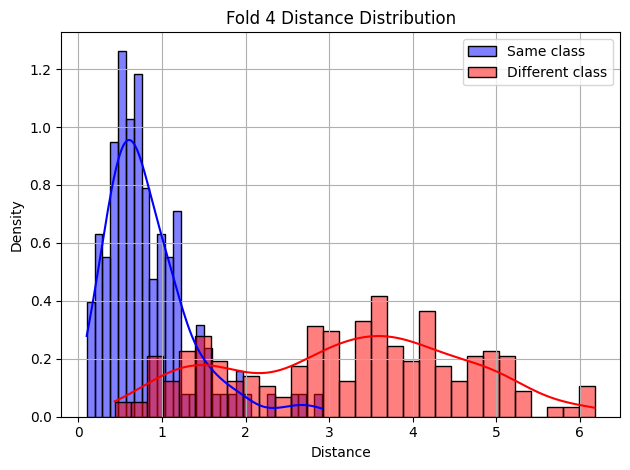

2025-06-02 23:00:24,030 - INFO - Fold 4 distance stats: {'same_class_mean': np.float64(0.8294106907558823), 'same_class_std': np.float64(0.5130195095422414), 'diff_class_mean': np.float64(3.2161582939790403), 'diff_class_std': np.float64(1.370277038194527), 'margin': np.float64(2.3867476032231583)}
2025-06-02 23:00:24,031 - INFO - Fold 5/5...
2025-06-02 23:00:24,032 - INFO - Fitting SVM classifier...
2025-06-02 23:00:24,032 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:24,072 - INFO - Making predictions with SVM classifier...
2025-06-02 23:00:24,073 - DEBUG - Computing kernel matrix...
2025-06-02 23:00:24,095 - INFO - Accuracy: 0.9333
2025-06-02 23:00:24,096 - INFO - Fold 5 accuracy: 0.9333
2025-06-02 23:00:24,097 - INFO - Computing distance distribution statistics for metric-based classifier...


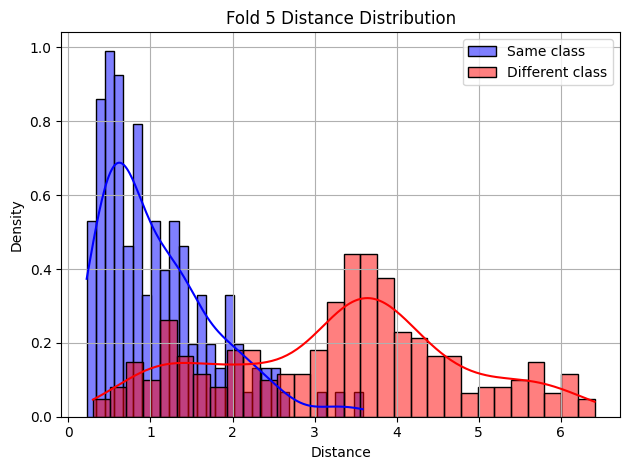

2025-06-02 23:00:24,419 - INFO - Fold 5 distance stats: {'same_class_mean': np.float64(1.0803961361622683), 'same_class_std': np.float64(0.6829156745860143), 'diff_class_mean': np.float64(3.315103976231603), 'diff_class_std': np.float64(1.4384548284322602), 'margin': np.float64(2.2347078400693343)}
2025-06-02 23:00:24,420 - INFO - Mean cross-validation accuracy: 0.9667


Accuracy: 0.97


In [2]:
dataLoader = DistDataLoader("../data")
dataset = dataLoader.load_dataset('iris')
if dataset is None:
    print("Failed to load dataset.")
else:
    evaluator = Evaluator()
    knn = KNNWrapper(metric_func=EuclideanMetric(), n_neighbors=10)
    svm = SVMWrapper(metric_func=EuclideanMetric())

    score = evaluator.crossValidateClassifier(dataset, svm, n_splits=5)
    print(f"Accuracy: {score:.2f}")


In [8]:
# 1. Basic Usage Example
def basic_evaluation():
    # Create an evaluator instance
    evaluator = CustomMetricEvaluator()
    
    # Choose a dataset to evaluate
    dataset_name = 'iris'  # Options: 'iris', 'wine', 'seeds', 'banknote', 'heart', 'adult'
    
    # Run evaluations with default metrics
    results = evaluator.run_evaluations(dataset_name)
    
    # Visualize the results
    evaluator.visualize_results(results)
    
    return results

# 2. Custom Distance Metric Example
def custom_metric_example():
    # Create an evaluator instance
    evaluator = CustomMetricEvaluator()
    
    # Define a custom distance metric - weighted Euclidean
    def weighted_euclidean(x, y):
        weights = np.array([2.0, 1.0, 0.5, 1.5])  # Custom weights for features
        return np.sqrt(np.sum(weights * ((x - y) ** 2)))
    
    # Add the custom metric to the evaluator
    evaluator.define_custom_distance_metric('weighted_euclidean', weighted_euclidean)
    
    # Run evaluations with the custom metric included
    results = evaluator.run_evaluations('iris')
    
    # Visualize the results
    evaluator.visualize_results(results)
    
    return results

# 3. Mahalanobis-like Metric Example (for evolutionary algorithms)
def mahalanobis_example():
    # Create an evaluator instance
    evaluator = CustomMetricEvaluator()
    
    # Load a dataset to get the number of features
    X, y, _, _, _, _ = evaluator.load_dataset('iris')
    n_features = X.shape[1]
    
    # Create a custom weight matrix (this would be evolved in your EA)
    # Starting with a simple positive definite matrix
    W = np.eye(n_features)  # Identity matrix
    
    # Modify to create feature interactions (off-diagonal elements)
    # This represents how features interact in the distance calculation
    W[0, 1] = W[1, 0] = 0.5  # Correlation between features 0 and 1
    W[2, 3] = W[3, 2] = -0.3  # Anti-correlation between features 2 and 3
    
    # Create the metric using our weight matrix
    def mahalanobis_metric(x, y):
        diff = x - y
        return np.sqrt(diff.dot(W).dot(diff))
    
    # Add the custom metric to the evaluator
    evaluator.define_custom_distance_metric('mahalanobis_custom', mahalanobis_metric)
    
    # Run evaluations
    results = evaluator.run_evaluations('iris')
    
    # Visualize the results
    evaluator.visualize_results(results)
    
    return results, W

# 4. Comparing Multiple Datasets
def compare_datasets():
    evaluator = CustomMetricEvaluator()
    
    # List of datasets to compare
    datasets = ['iris', 'wine', 'banknote']
    
    # Store results for each dataset
    all_results = {}
    
    # Run evaluations for each dataset
    for dataset in datasets:
        print(f"\n{'='*50}")
        print(f"Evaluating {dataset} dataset")
        print(f"{'='*50}")
        results = evaluator.run_evaluations(dataset)
        all_results[dataset] = results
        
    # Create comparison visualization
    compare_knn_across_datasets(all_results)

### Experiment 1

2025-05-20 12:27:44,837 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-05-20 12:27:44,839 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2025-05-20 12:27:44,842 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2025-05-20 12:27:44,843 - DEBUG - findfont: score(FontEntry(fname='/home/guter/Masters_1/program_synthesis/inDISTrial_rEVOLUTION/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2025-05-20 12:27:44,843 - DEBUG - findfont: score(FontEntry(fname='/home/guter/Masters_1/program_synthesis/inDISTrial_rEVOLUTION/.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 

Evaluating KNN on iris...
  euclidean: 0.9111
  manhattan: 0.9111
  cosine: 0.7778
  chebyshev: 0.8889
Evaluating KMeans on iris...
  Error with KMeans using euclidean: Invalid format specifier '.4f if results['kmeans'][metric_name]['silhouette'] is not None else 'N/A'' for object of type 'float'
  Error with KMeans using manhattan: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
  Error with KMeans using cosine: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
Evaluating SVM on iris...
  linear: 0.9111
  poly: 0.8667
  rbf: 0.9333
  sigmoid: 0.9111
  euclidean_kernel: 0.9111
  manhattan_kernel: 0.9111
  cosine_kernel: 0.7778
  chebyshev_kernel: 0.8444


2025-05-20 12:27:44,902 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifGeorgian-Regular.ttf', name='Noto Serif Georgian', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-05-20 12:27:44,902 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/opentype/urw-base35/NimbusRoman-BoldItalic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2025-05-20 12:27:44,903 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSansTamilSupplement-Regular.ttf', name='Noto Sans Tamil Supplement', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2025-05-20 12:27:44,903 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/truetype/noto/NotoSerifTibetan-Bold.ttf', name='Noto Serif Tibetan', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
20

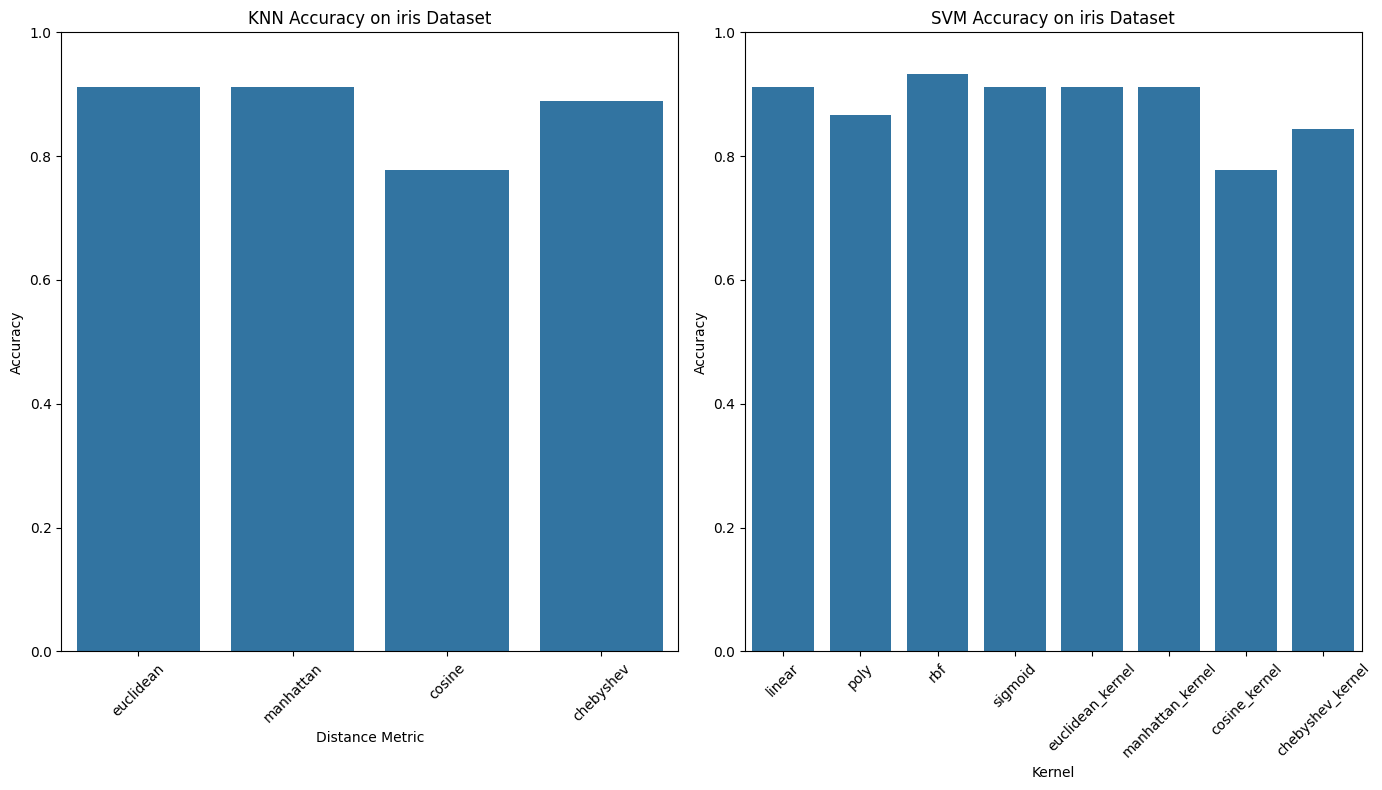

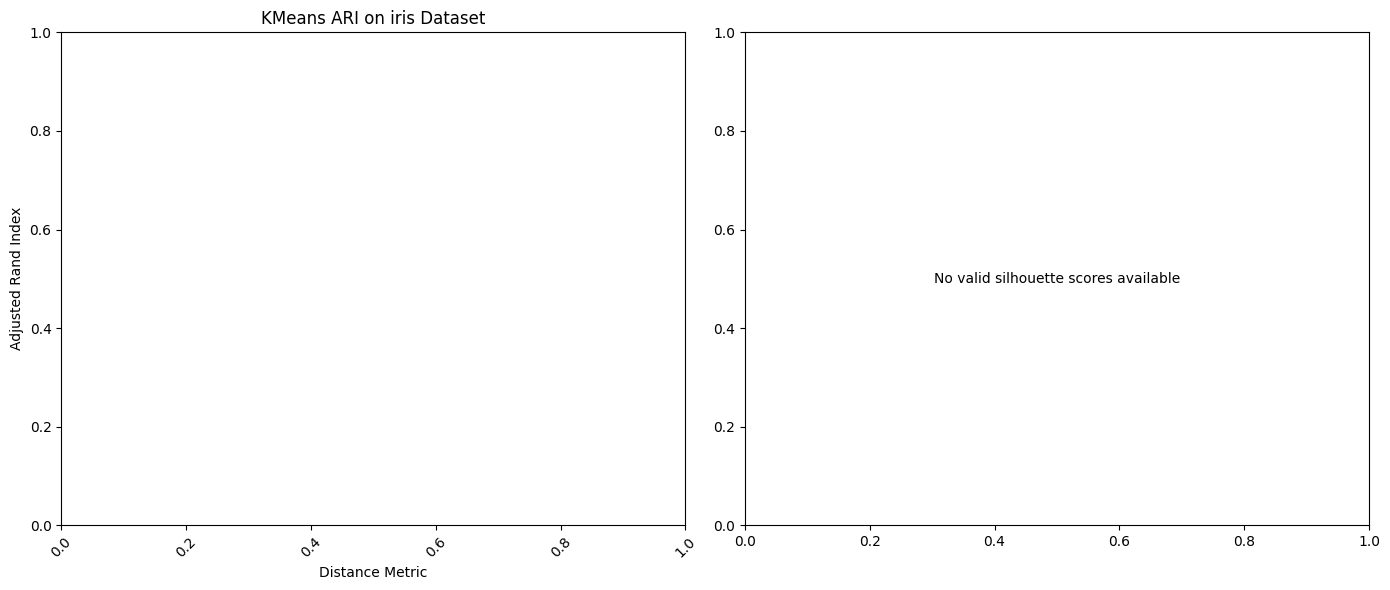

{'dataset': 'iris',
 'n_samples': 150,
 'n_features': 4,
 'n_classes': 3,
 'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'knn': {'euclidean': {'accuracy': 0.9111111111111111,
   'time': 0.005377054214477539,
   'model': KNeighborsClassifier(metric='euclidean')},
  'manhattan': {'accuracy': 0.9111111111111111,
   'time': 0.0026862621307373047,
   'model': KNeighborsClassifier(metric='manhattan')},
  'cosine': {'accuracy': 0.7777777777777778,
   'time': 0.0030431747436523438,
   'model': KNeighborsClassifier(metric='cosine')},
  'chebyshev': {'accuracy': 0.8888888888888888,
   'time': 0.0023097991943359375,
   'model': KNeighborsClassifier(metric='chebyshev')}},
 'kmeans': {'euclidean': {'error': "Invalid format specifier '.4f if results['kmeans'][metric_name]['silhouette'] is not None else 'N/A'' for object of type 'float'"},
  'manhattan': {'error':

In [9]:
basic_evaluation()  # Uncomment to run the basic evaluation

### Experiment 2

Added custom metric: weighted_euclidean
Evaluating KNN on iris...
  euclidean: 0.9111
  manhattan: 0.9111
  cosine: 0.7778
  chebyshev: 0.8889
  weighted_euclidean: 0.9333
Evaluating KMeans on iris...
  Error with KMeans using euclidean: Invalid format specifier '.4f if results['kmeans'][metric_name]['silhouette'] is not None else 'N/A'' for object of type 'float'
  Error with KMeans using manhattan: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
  Error with KMeans using cosine: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
Evaluating SVM on iris...
  linear: 0.9111
  poly: 0.8667
  rbf: 0.9333
  sigmoid: 0.9111
  euclidean_kernel: 0.9111
  manhattan_kernel: 0.9111
  cosine_kernel: 0.7778
  chebyshev_kernel: 0.8444


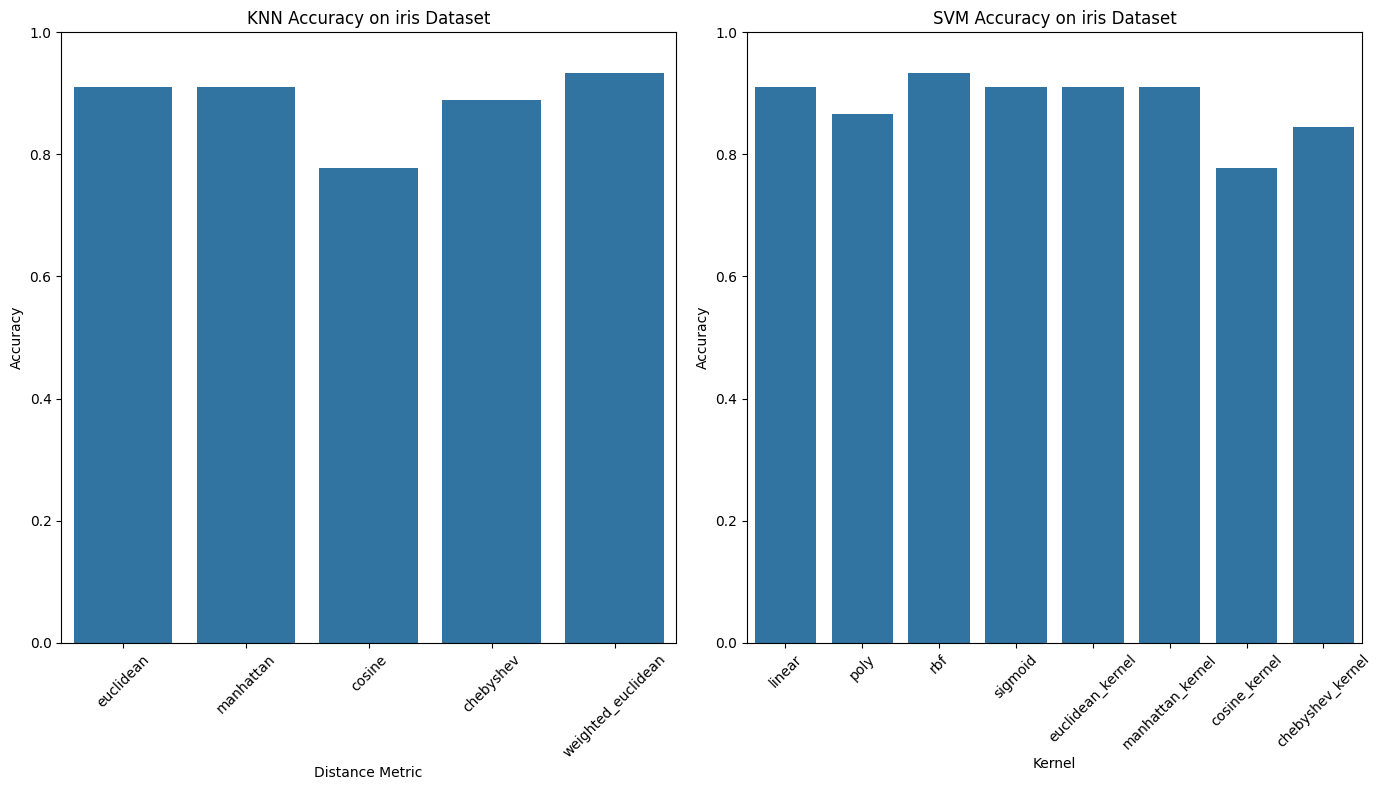

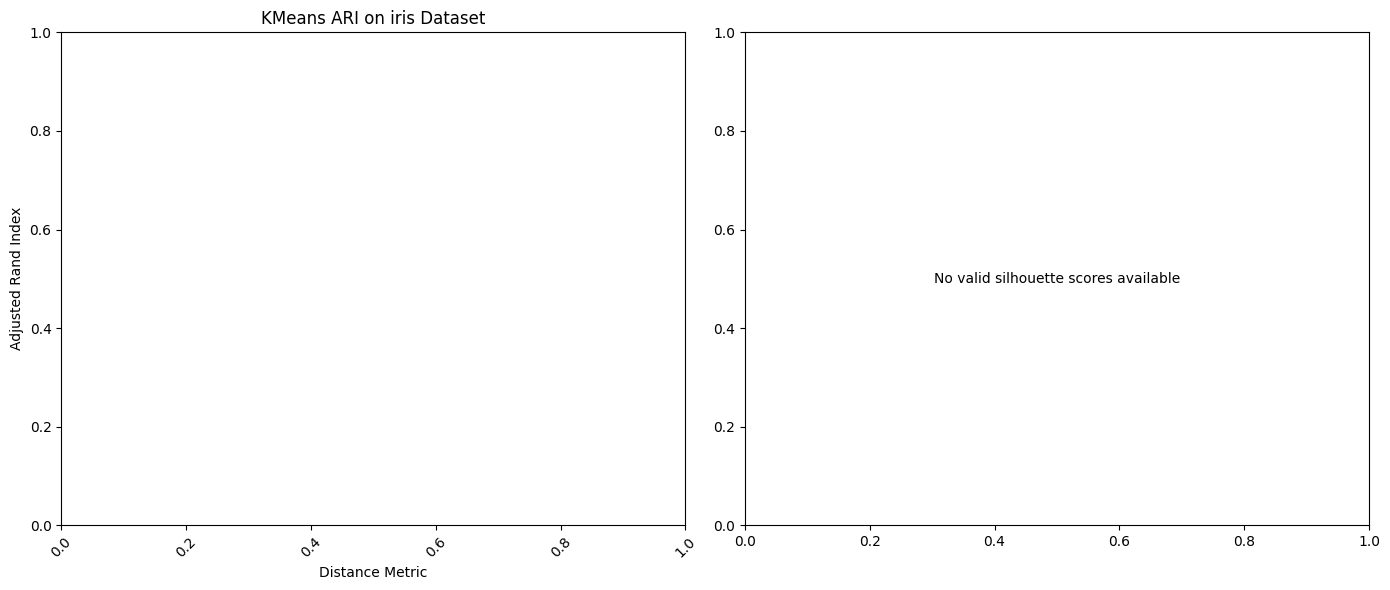

{'dataset': 'iris',
 'n_samples': 150,
 'n_features': 4,
 'n_classes': 3,
 'feature_names': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 'knn': {'euclidean': {'accuracy': 0.9111111111111111,
   'time': 0.00383758544921875,
   'model': KNeighborsClassifier(metric='euclidean')},
  'manhattan': {'accuracy': 0.9111111111111111,
   'time': 0.002493143081665039,
   'model': KNeighborsClassifier(metric='manhattan')},
  'cosine': {'accuracy': 0.7777777777777778,
   'time': 0.002947092056274414,
   'model': KNeighborsClassifier(metric='cosine')},
  'chebyshev': {'accuracy': 0.8888888888888888,
   'time': 0.0022802352905273438,
   'model': KNeighborsClassifier(metric='chebyshev')},
  'weighted_euclidean': {'accuracy': 0.9333333333333333,
   'time': 0.026106595993041992,
   'model': KNeighborsClassifier(metric=<function custom_metric_example.<locals>.weighted_euclidean at 0x7

In [10]:
custom_metric_example()

### Experiment 3

Added custom metric: mahalanobis_custom
Evaluating KNN on iris...
  euclidean: 0.9111
  manhattan: 0.9111
  cosine: 0.7778
  chebyshev: 0.8889
  mahalanobis_custom: 0.9111
Evaluating KMeans on iris...
  Error with KMeans using euclidean: Invalid format specifier '.4f if results['kmeans'][metric_name]['silhouette'] is not None else 'N/A'' for object of type 'float'
  Error with KMeans using manhattan: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
  Error with KMeans using cosine: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
Evaluating SVM on iris...
  linear: 0.9111
  poly: 0.8667
  rbf: 0.9333
  sigmoid: 0.9111
  euclidean_kernel: 0.9111
  manhattan_kernel: 0.9111
  cosine_kernel: 0.7778
  chebyshev_kernel: 0.8444


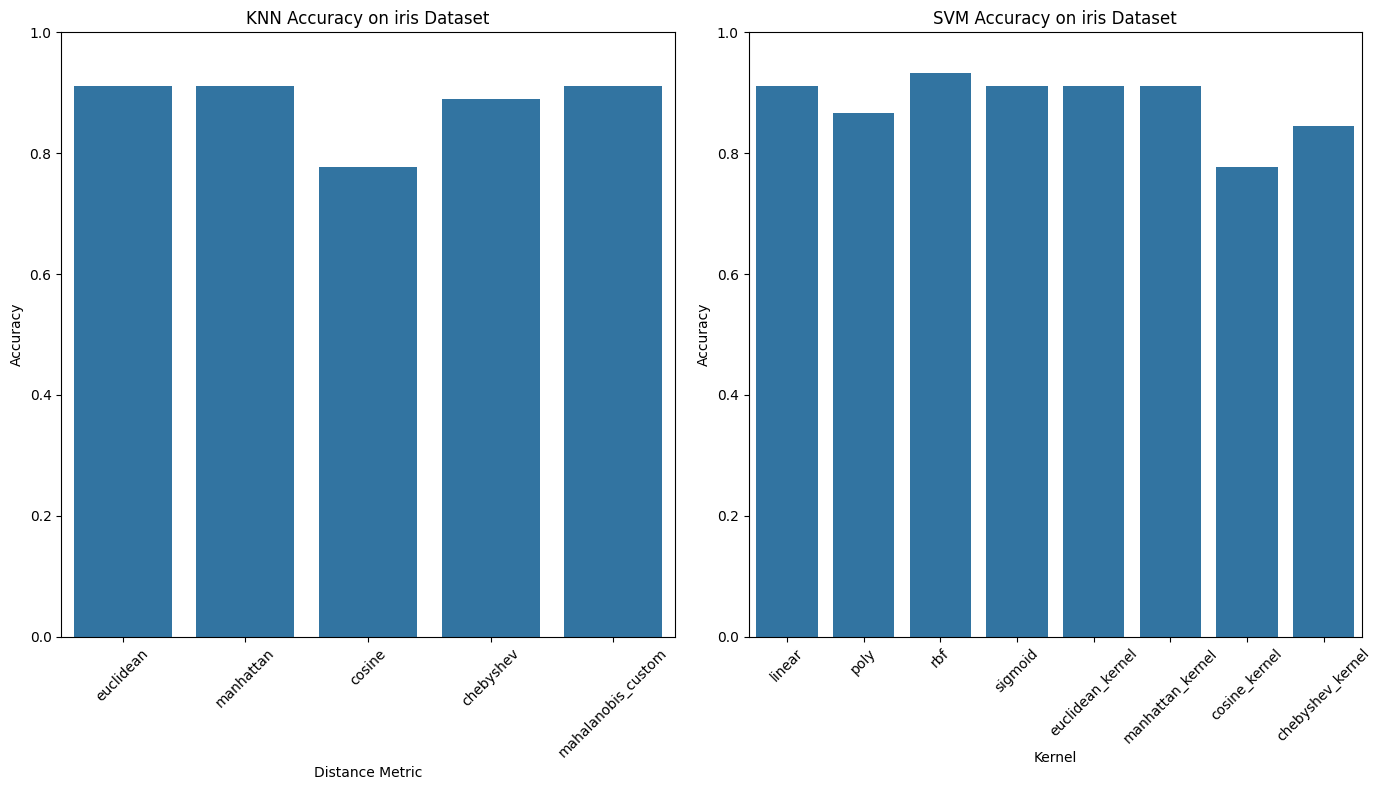

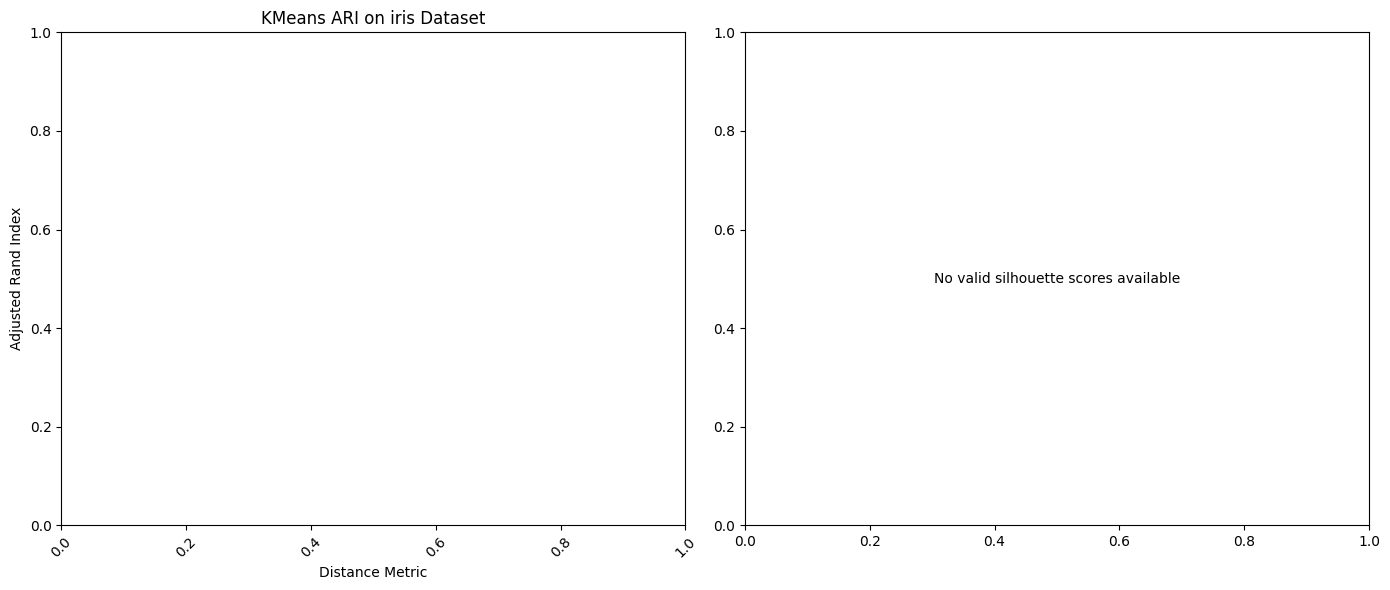

({'dataset': 'iris',
  'n_samples': 150,
  'n_features': 4,
  'n_classes': 3,
  'feature_names': ['sepal length (cm)',
   'sepal width (cm)',
   'petal length (cm)',
   'petal width (cm)'],
  'target_names': array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
  'knn': {'euclidean': {'accuracy': 0.9111111111111111,
    'time': 0.0029981136322021484,
    'model': KNeighborsClassifier(metric='euclidean')},
   'manhattan': {'accuracy': 0.9111111111111111,
    'time': 0.0028641223907470703,
    'model': KNeighborsClassifier(metric='manhattan')},
   'cosine': {'accuracy': 0.7777777777777778,
    'time': 0.0024259090423583984,
    'model': KNeighborsClassifier(metric='cosine')},
   'chebyshev': {'accuracy': 0.8888888888888888,
    'time': 0.002695322036743164,
    'model': KNeighborsClassifier(metric='chebyshev')},
   'mahalanobis_custom': {'accuracy': 0.9111111111111111,
    'time': 0.01499485969543457,
    'model': KNeighborsClassifier(metric=<function mahalanobis_example.<locals>.m

In [11]:
mahalanobis_example()

### Experiment 4

In [12]:
compare_datasets()


Evaluating iris dataset
Evaluating KNN on iris...
  euclidean: 0.9111
  manhattan: 0.9111
  cosine: 0.7778
  chebyshev: 0.8889
Evaluating KMeans on iris...
  Error with KMeans using euclidean: Invalid format specifier '.4f if results['kmeans'][metric_name]['silhouette'] is not None else 'N/A'' for object of type 'float'
  Error with KMeans using manhattan: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
  Error with KMeans using cosine: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'
Evaluating SVM on iris...
  linear: 0.9111
  poly: 0.8667
  rbf: 0.9333
  sigmoid: 0.9111
  euclidean_kernel: 0.9111
  manhattan_kernel: 0.9111
  cosine_kernel: 0.7778
  chebyshev_kernel: 0.8444

Evaluating wine dataset
Evaluating KNN on wine...
  euclidean: 0.9444
  manhattan: 0.9815
  cosine: 0.9630
  chebyshev: 0.8889
Evaluating KMeans on wine...
  Error with KMeans using euclidean: Invalid format specifier '.4f if results['kmeans'][metr

NameError: name 'compare_knn_across_datasets' is not defined